# Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('/content/combined_data.csv')

# Display the first few rows
print(data.head())


     Experiment  B_Ramp_Angle  B_Diffusor_Angle  B_Trunklid_Angle  \
0  E_S_WWC_WM_1      8.672640          12.26980          -6.93812   
1  E_S_WWC_WM_2     -0.038876          -2.46694           5.82266   
2  E_S_WWC_WM_3      9.576470           6.51376          -5.85023   
3  E_S_WWC_WM_4     10.350600          14.84640           4.04619   
4  E_S_WWC_WM_5     12.971500          10.61980          -6.48716   

   C_Side_Mirrors_Rotation  D_Rear_Window_Inclination  \
0                 10.98820                       1.98   
1                -15.84790                      -1.00   
2                 -1.38529                      -0.55   
3                -10.91980                       1.17   
4                  6.18597                       2.25   

   D_Winscreen_Inclination  C_Side_Mirrors_Translate_X  \
0                    -0.95                    -5.14719   
1                     2.44                    17.49850   
2                     1.44                    -5.29082   
3         

# Performing EDA

In [3]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Dataset contains 3747 rows and 26 columns.


In [4]:
print(data.isnull().sum())


Experiment                    0
B_Ramp_Angle                  0
B_Diffusor_Angle              0
B_Trunklid_Angle              0
C_Side_Mirrors_Rotation       0
D_Rear_Window_Inclination     0
D_Winscreen_Inclination       0
C_Side_Mirrors_Translate_X    0
C_Side_Mirrors_Translate_Z    0
D_Winscreen_Length            0
D_Rear_Window_Length          0
E_A_B_C_Pillar_Thickness      0
G_Trunklid_Curvature          0
G_Trunklid_Length             0
H_Front_Bumper_Curvature      0
H_Front_Bumper_Length         0
F_Door_Handles_Thickness      0
F_Door_Handles_Z_Position     0
E_Fenders_Arch_Offset         0
A_Car_Length                  0
F_Door_Handles_X_Position     0
A_Car_Width                   0
A_Car_Roof_Height             0
A_Car_Green_House_Angle       0
Average Cd                    0
Std Cd                        0
dtype: int64


In [5]:
print(data.dtypes)


Experiment                     object
B_Ramp_Angle                  float64
B_Diffusor_Angle              float64
B_Trunklid_Angle              float64
C_Side_Mirrors_Rotation       float64
D_Rear_Window_Inclination     float64
D_Winscreen_Inclination       float64
C_Side_Mirrors_Translate_X    float64
C_Side_Mirrors_Translate_Z    float64
D_Winscreen_Length            float64
D_Rear_Window_Length          float64
E_A_B_C_Pillar_Thickness      float64
G_Trunklid_Curvature          float64
G_Trunklid_Length             float64
H_Front_Bumper_Curvature      float64
H_Front_Bumper_Length         float64
F_Door_Handles_Thickness      float64
F_Door_Handles_Z_Position     float64
E_Fenders_Arch_Offset         float64
A_Car_Length                  float64
F_Door_Handles_X_Position     float64
A_Car_Width                   float64
A_Car_Roof_Height             float64
A_Car_Green_House_Angle       float64
Average Cd                    float64
Std Cd                        float64
dtype: objec

In [6]:
# Summary statistics
data.describe()


,B_Ramp_Angle,B_Diffusor_Angle,B_Trunklid_Angle,C_Side_Mirrors_Rotation,D_Rear_Window_Inclination,D_Winscreen_Inclination,C_Side_Mirrors_Translate_X,C_Side_Mirrors_Translate_Z,D_Winscreen_Length,D_Rear_Window_Length,...,F_Door_Handles_Thickness,F_Door_Handles_Z_Position,E_Fenders_Arch_Offset,A_Car_Length,F_Door_Handles_X_Position,A_Car_Width,A_Car_Roof_Height,A_Car_Green_House_Angle,Average Cd,Std Cd
count,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,...,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000
mean,3.474832,3.435537,5.931821,-0.117027,0.334481,0.337326,5.000215,2.540636,-0.470353,27.106978,...,5.107555,-0.171992,14.864634,35.436974,0.681859,43.904842,14.843401,-24.668229,0.255845,0.006657
std,6.602161,6.675723,8.119145,11.579901,1.231196,1.247723,8.604916,4.299605,28.839275,70.798604,...,14.396548,17.244911,23.218969,54.967253,28.934905,60.398368,43.435249,101.584557,0.022881,0.002235
min,-7.985770,-7.983000,-7.977390,-19.996400,-1.790000,-1.800000,-9.969590,-4.984890,-49.964600,-94.811000,...,-19.960800,-29.982600,-24.941500,-59.912500,-49.995400,-59.816700,-59.983200,-199.761000,0.201138,0.000043
25%,-2.229625,-2.388720,-1.092790,-10.220350,-0.740000,-0.755000,-2.425275,-1.154680,-25.602700,-34.443700,...,-7.231840,-15.146500,-5.650760,-11.891900,-24.210300,-8.281560,-23.001700,-113.917000,0.238350,0.005107
50%,3.520840,3.343170,5.885420,-0.171758,0.350000,0.310000,4.878460,2.566000,-0.620434,27.146000,...,5.158890,-0.360752,14.745900,34.927000,1.269880,42.723100,14.776600,-23.012100,0.255021,0.006333
75%,9.146770,9.309470,13.033000,9.921130,1.385000,1.420000,12.453450,6.253890,24.519700,88.415450,...,17.600300,14.495500,35.197400,84.115000,25.773500,96.122300,52.698600,61.687500,0.272691,0.007850
max,14.999400,14.967200,19.985900,19.960700,2.500000,2.500000,19.970800,9.989460,49.879000,149.948000,...,29.972900,29.990000,54.988500,129.840000,49.991100,149.714000,89.998600,149.899000,0.323905,0.018897


Average Cd ranges from 0.2011383671561462 to 0.3239046290598006


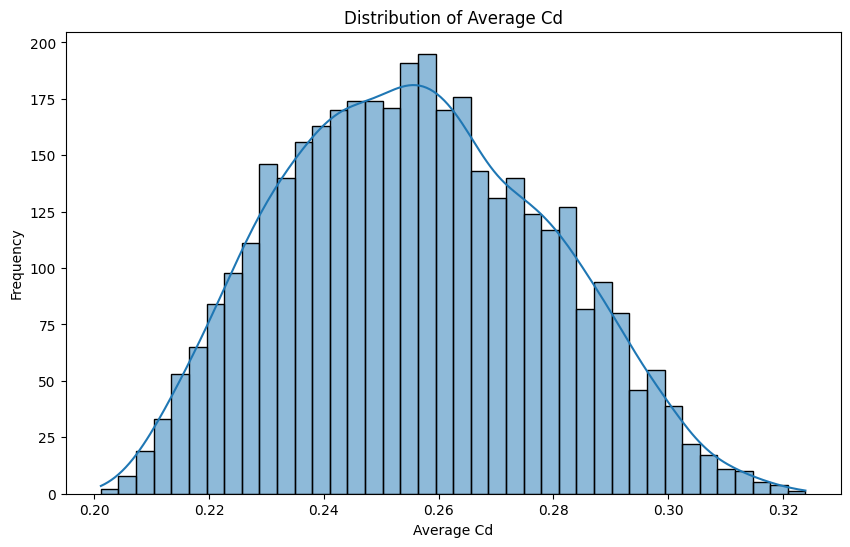

In [7]:
# Range of 'Average Cd'
print(f"Average Cd ranges from {data['Average Cd'].min()} to {data['Average Cd'].max()}")

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Average Cd'], kde=True, bins=40)
plt.title('Distribution of Average Cd')
plt.xlabel('Average Cd')
plt.ylabel('Frequency')
plt.show()


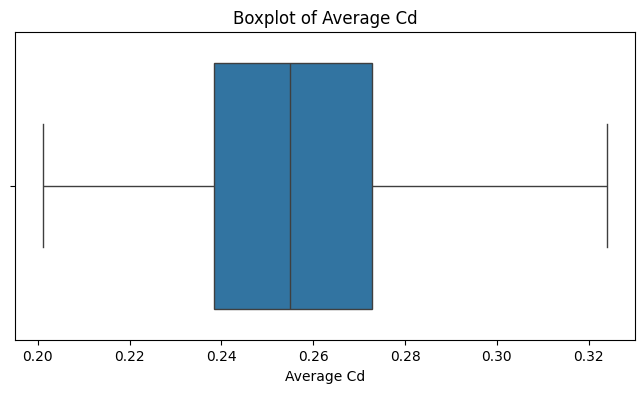

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Average Cd'])
plt.title('Boxplot of Average Cd')
plt.show()


In [9]:
# Calculate correlation matrix
data_1 = data.drop(columns=['Experiment', "Std Cd"])
corr_matrix = data_1.corr()


corr_matrix

,B_Ramp_Angle,B_Diffusor_Angle,B_Trunklid_Angle,C_Side_Mirrors_Rotation,D_Rear_Window_Inclination,D_Winscreen_Inclination,C_Side_Mirrors_Translate_X,C_Side_Mirrors_Translate_Z,D_Winscreen_Length,D_Rear_Window_Length,...,H_Front_Bumper_Length,F_Door_Handles_Thickness,F_Door_Handles_Z_Position,E_Fenders_Arch_Offset,A_Car_Length,F_Door_Handles_X_Position,A_Car_Width,A_Car_Roof_Height,A_Car_Green_House_Angle,Average Cd
B_Ramp_Angle,1.000000,-0.040561,0.007622,-0.010885,-0.016790,-0.005473,0.037009,-0.035714,-0.009576,0.014093,...,-0.005819,0.005888,0.017189,-0.004488,-0.023794,0.005310,-0.059437,-0.021649,0.023183,-0.114841
B_Diffusor_Angle,-0.040561,1.000000,-0.057430,0.009759,-0.022971,-0.036711,0.049678,-0.005153,-0.008333,-0.008725,...,0.005584,-0.005455,-0.014711,0.006615,-0.017161,-0.024827,0.020021,-0.000708,0.018974,0.404573
B_Trunklid_Angle,0.007622,-0.057430,1.000000,-0.021721,0.011520,-0.009774,0.005026,0.006320,-0.017779,0.001137,...,-0.012486,0.038345,0.010499,0.014718,0.018553,-0.018106,-0.021900,0.017753,-0.014396,-0.026649
C_Side_Mirrors_Rotation,-0.010885,0.009759,-0.021721,1.000000,0.016440,-0.001151,-0.016016,0.006387,-0.009655,-0.017858,...,0.006501,0.025909,0.008335,-0.009592,0.002912,0.022471,0.015613,-0.013808,0.000715,-0.049394
D_Rear_Window_Inclination,-0.016790,-0.022971,0.011520,0.016440,1.000000,0.023288,0.010831,-0.003378,-0.016311,-0.028085,...,-0.029885,-0.004913,-0.017367,0.041544,0.021377,0.039065,0.002766,0.021248,-0.001018,0.087303
D_Winscreen_Inclination,-0.005473,-0.036711,-0.009774,-0.001151,0.023288,1.000000,0.023183,-0.035396,0.011431,0.015991,...,0.029464,0.025164,0.049097,0.037535,-0.017311,-0.048052,-0.034534,0.033866,0.005191,-0.030316
C_Side_Mirrors_Translate_X,0.037009,0.049678,0.005026,-0.016016,0.010831,0.023183,1.000000,0.021769,-0.012656,0.025957,...,0.027398,-0.032064,0.030269,0.014131,0.000203,0.020899,-0.000109,-0.024567,-0.050489,0.012332
C_Side_Mirrors_Translate_Z,-0.035714,-0.005153,0.006320,0.006387,-0.003378,-0.035396,0.021769,1.000000,-0.035475,0.038024,...,0.001988,-0.025869,0.006999,0.039528,-0.028799,0.036812,0.018616,0.003867,-0.005295,0.017136
D_Winscreen_Length,-0.009576,-0.008333,-0.017779,-0.009655,-0.016311,0.011431,-0.012656,-0.035475,1.000000,0.005070,...,-0.013198,-0.034301,-0.013749,-0.020278,0.003161,-0.030784,0.002162,0.025830,-0.008520,0.020507
D_Rear_Window_Length,0.014093,-0.008725,0.001137,-0.017858,-0.028085,0.015991,0.025957,0.038024,0.005070,1.000000,...,0.004188,0.030163,0.017989,-0.027941,0.016872,0.002679,-0.025258,0.012936,-0.029759,0.121007


In [10]:
# Correlation with 'Average Cd'
target_corr = corr_matrix['Average Cd'].sort_values(ascending=False)
print(target_corr)

Average Cd                    1.000000
E_Fenders_Arch_Offset         0.418137
B_Diffusor_Angle              0.404573
D_Rear_Window_Length          0.121007
D_Rear_Window_Inclination     0.087303
D_Winscreen_Length            0.020507
C_Side_Mirrors_Translate_Z    0.017136
F_Door_Handles_Thickness      0.013361
C_Side_Mirrors_Translate_X    0.012332
A_Car_Green_House_Angle       0.011741
F_Door_Handles_Z_Position     0.010706
A_Car_Roof_Height            -0.015105
B_Trunklid_Angle             -0.026649
D_Winscreen_Inclination      -0.030316
G_Trunklid_Length            -0.036682
H_Front_Bumper_Curvature     -0.036839
H_Front_Bumper_Length        -0.048587
C_Side_Mirrors_Rotation      -0.049394
F_Door_Handles_X_Position    -0.052112
G_Trunklid_Curvature         -0.075310
A_Car_Width                  -0.106853
B_Ramp_Angle                 -0.114841
A_Car_Length                 -0.190986
E_A_B_C_Pillar_Thickness     -0.308418
Name: Average Cd, dtype: float64


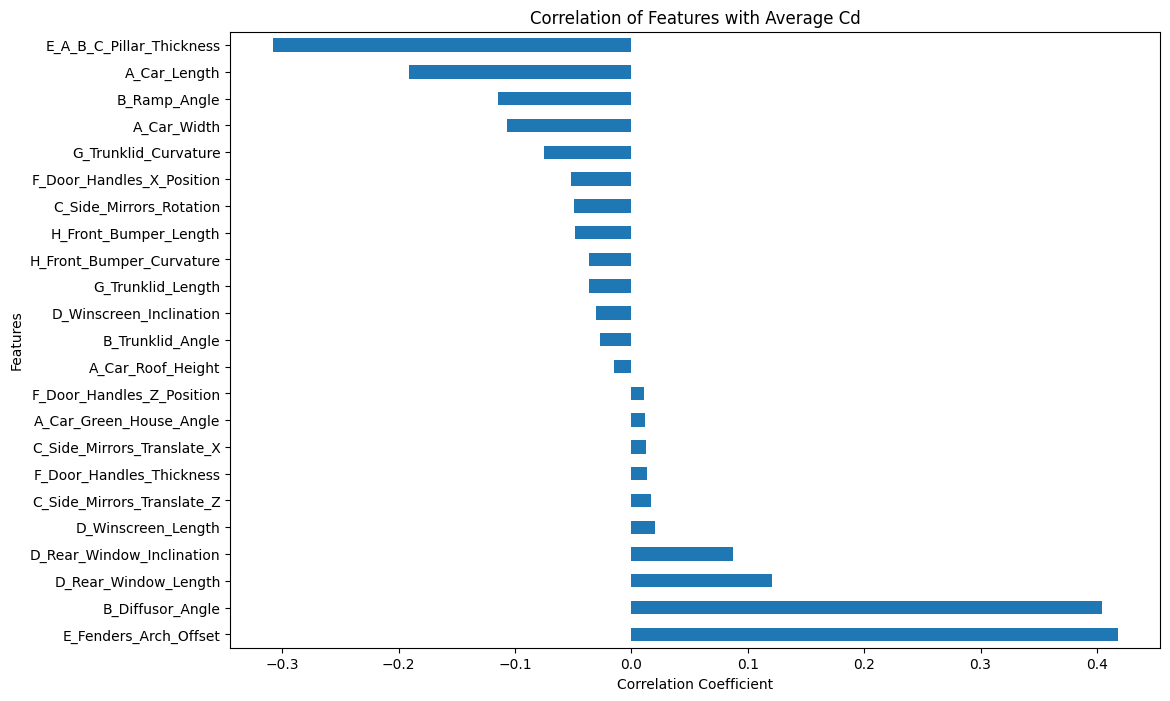

In [11]:
# Plot correlations with 'Average Cd'
plt.figure(figsize=(12, 8))
target_corr.drop('Average Cd').plot(kind='barh')
plt.title('Correlation of Features with Average Cd')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [12]:
# Top 5 positive correlations
print("Top 5 features positively correlated with Average Cd:")
print(target_corr.drop('Average Cd').head(5))

# Top 5 negative correlations
print("\nTop 5 features negatively correlated with Average Cd:")
print(target_corr.drop('Average Cd').tail(5))


Top 5 features positively correlated with Average Cd:
E_Fenders_Arch_Offset        0.418137
B_Diffusor_Angle             0.404573
D_Rear_Window_Length         0.121007
D_Rear_Window_Inclination    0.087303
D_Winscreen_Length           0.020507
Name: Average Cd, dtype: float64

Top 5 features negatively correlated with Average Cd:
G_Trunklid_Curvature       -0.075310
A_Car_Width                -0.106853
B_Ramp_Angle               -0.114841
A_Car_Length               -0.190986
E_A_B_C_Pillar_Thickness   -0.308418
Name: Average Cd, dtype: float64


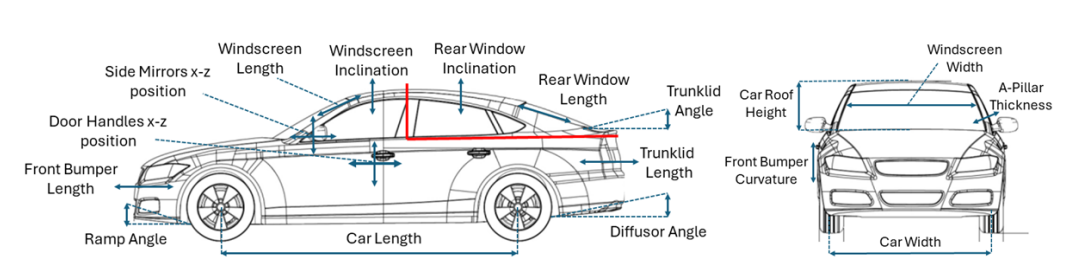

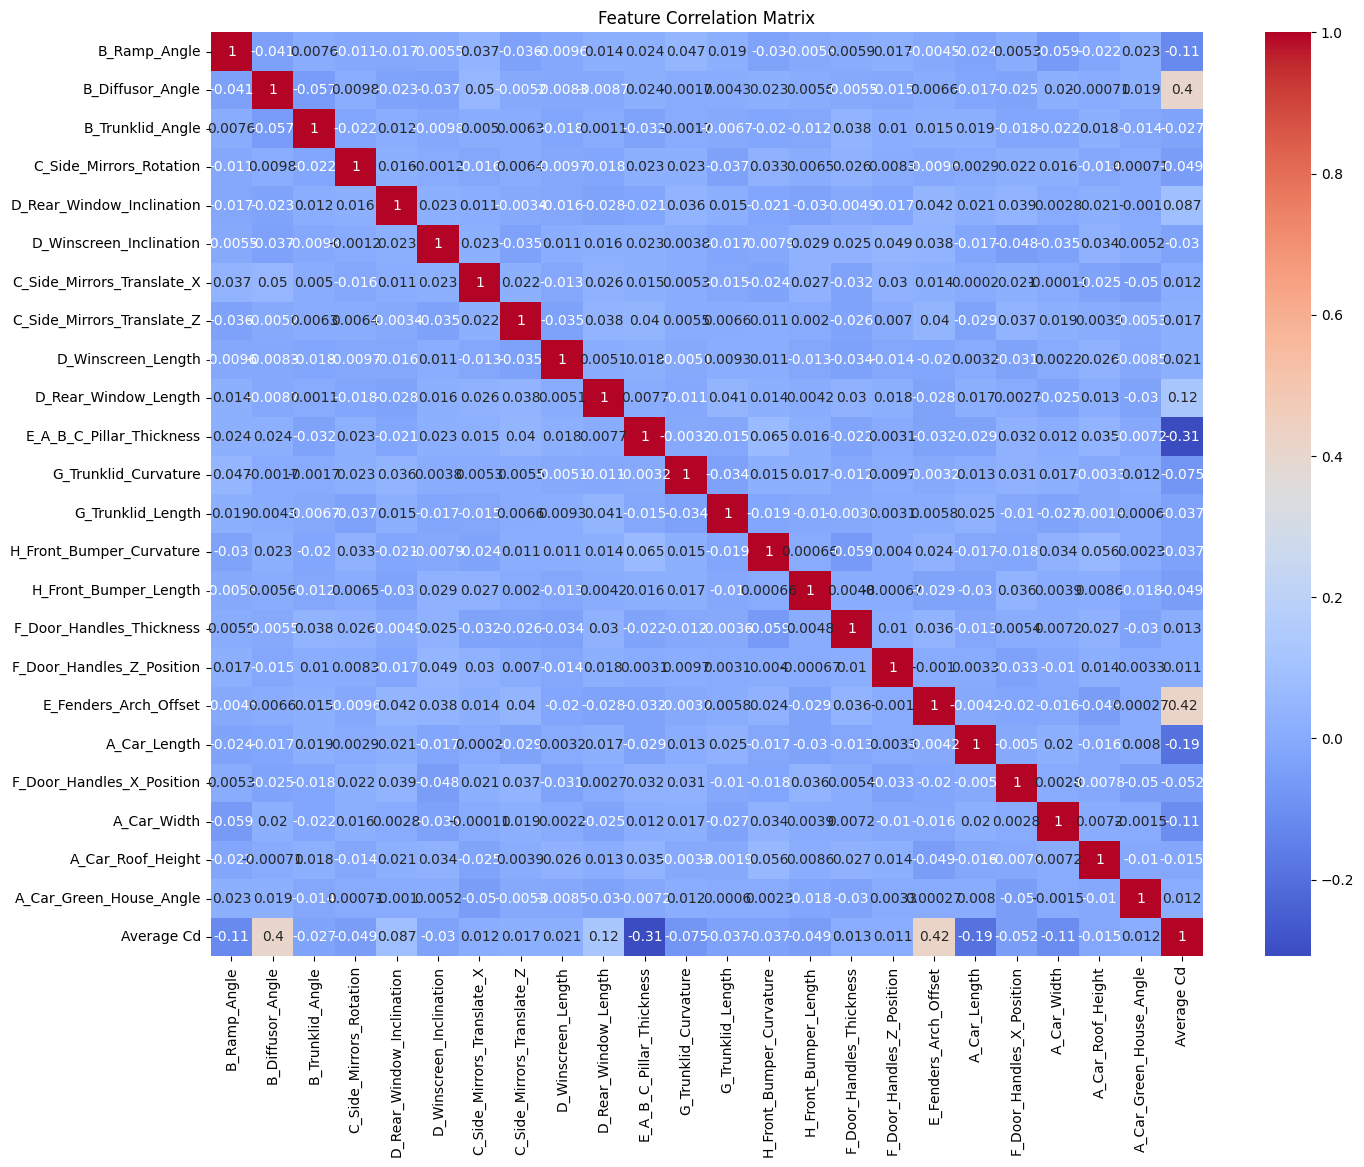

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [14]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8 or less than -0.8
high_corr = [column for column in upper.columns if any((upper[column] > 0.3) | (upper[column] < -0.3))]


print("Highly correlated features (>|0.3|):")
for column in high_corr:
    print(f"{column}:")
    print(upper[column][(upper[column] > 0.3) | (upper[column] < -0.3)])
    print("-------")


Highly correlated features (>|0.3|):
Average Cd:
B_Diffusor_Angle            0.404573
E_A_B_C_Pillar_Thickness   -0.308418
E_Fenders_Arch_Offset       0.418137
Name: Average Cd, dtype: float64
-------


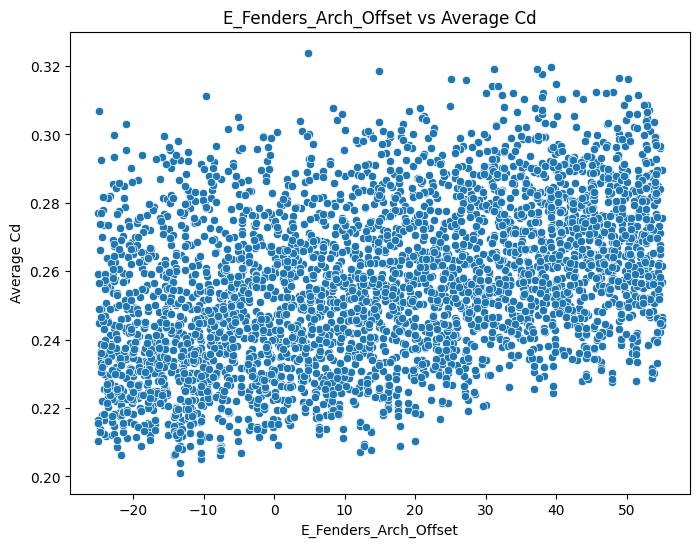

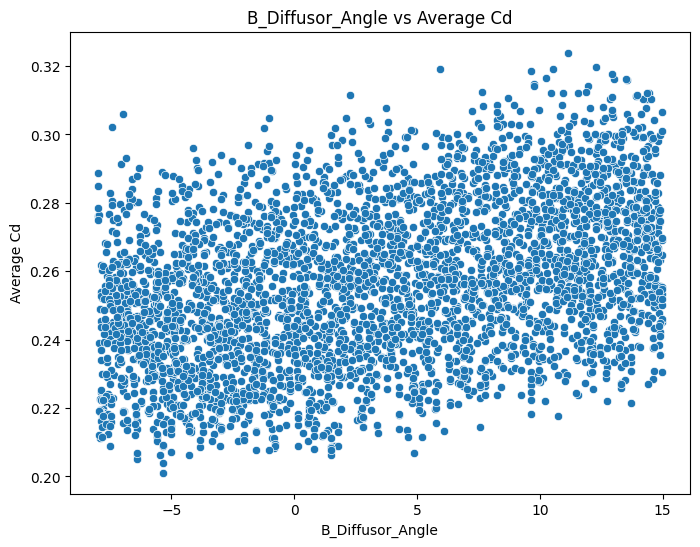

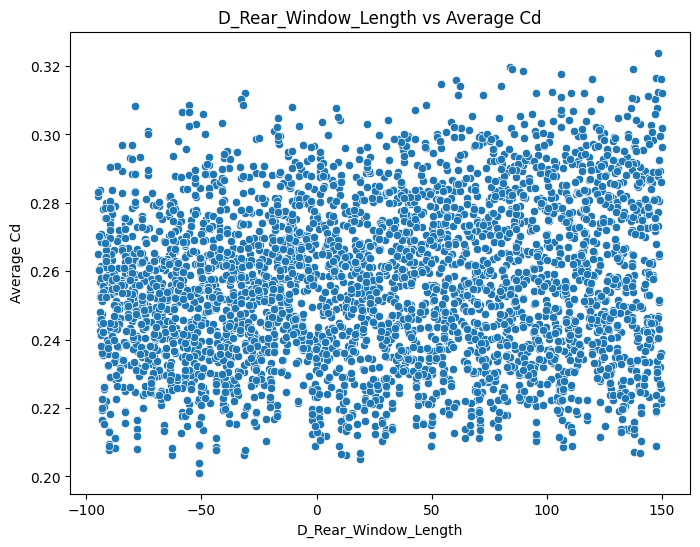

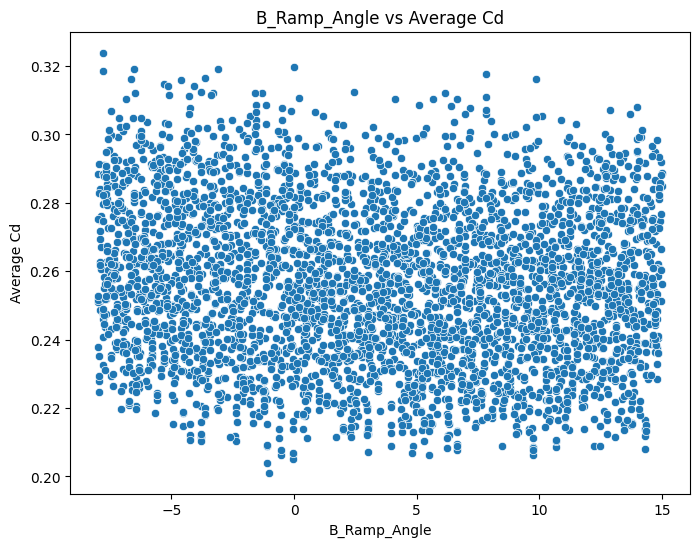

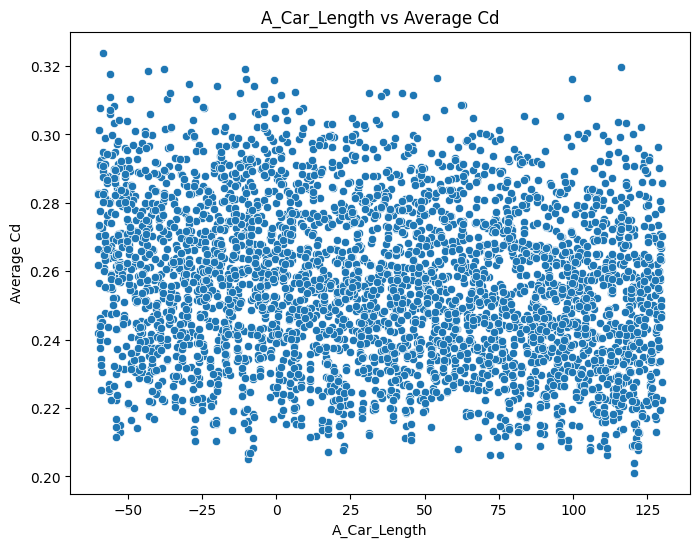

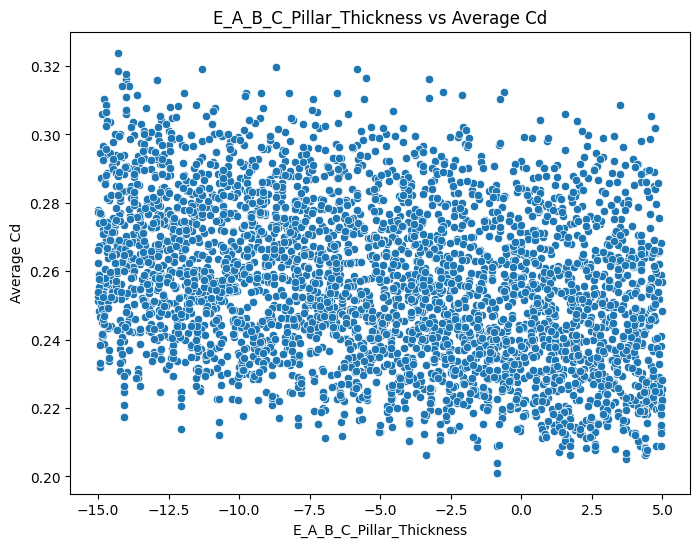

In [15]:
# Select top 3 features positively correlated with 'Average Cd'
top_positive_features = target_corr.drop('Average Cd').head(3).index.tolist()

# Select top 3 features negatively correlated with 'Average Cd'
top_negative_features = target_corr.drop('Average Cd').tail(3).index.tolist()

# Plot scatter plots
for feature in top_positive_features + top_negative_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['Average Cd'])
    plt.title(f'{feature} vs Average Cd')
    plt.xlabel(feature)
    plt.ylabel('Average Cd')
    plt.show()


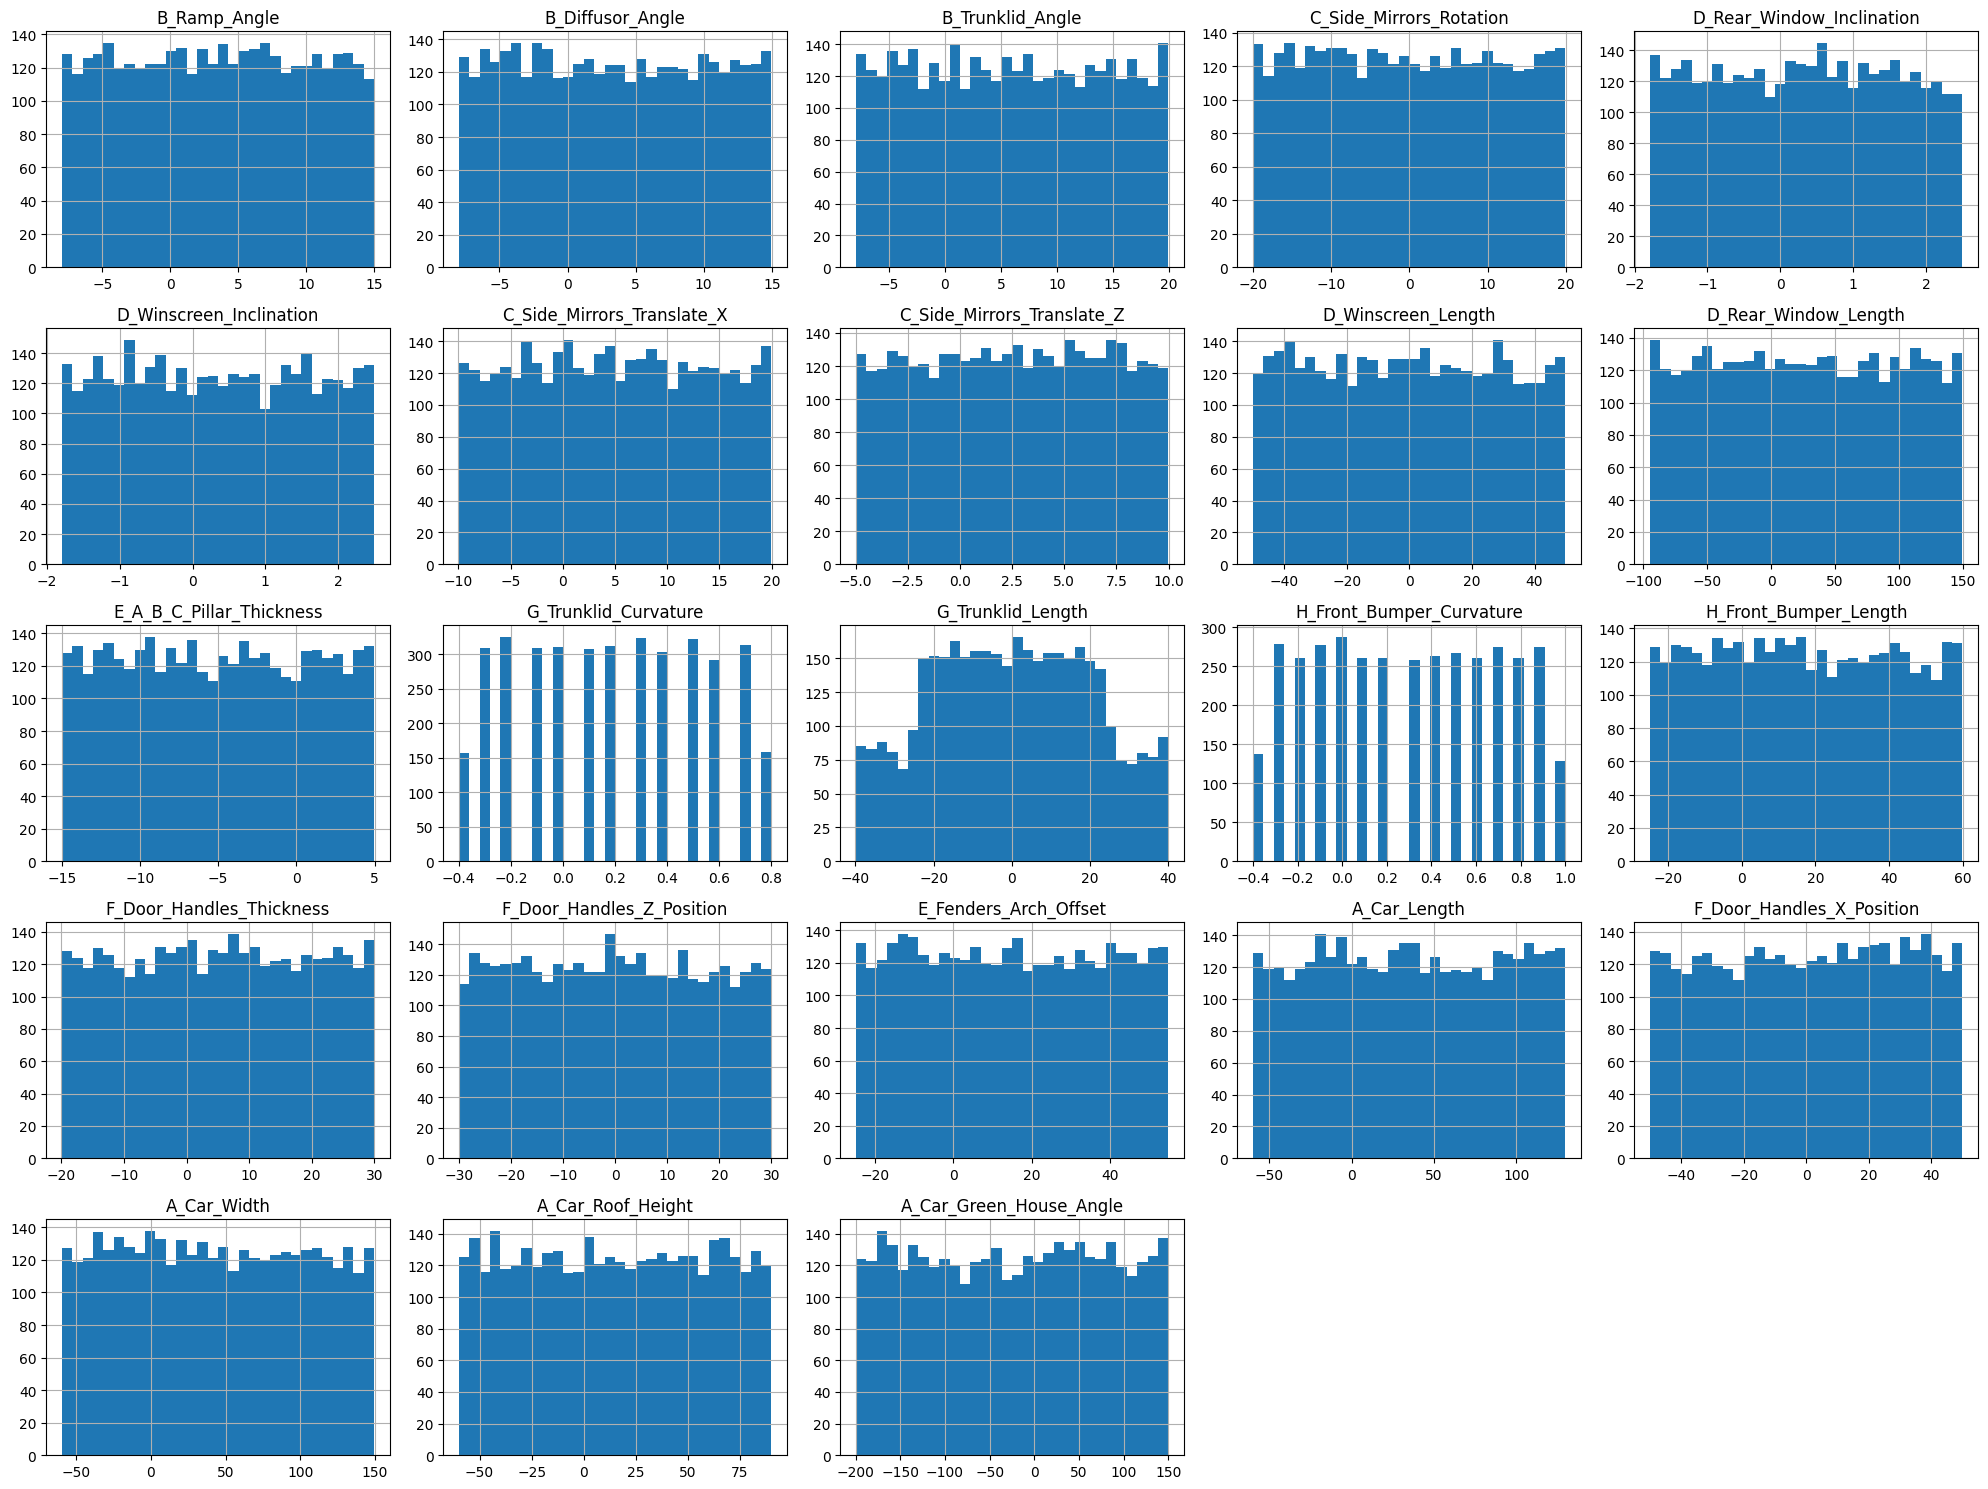

In [16]:
# List of feature columns (excluding 'Experiment', 'Average Cd', and 'Std Cd')
feature_columns = data.columns.drop(['Experiment', 'Average Cd', 'Std Cd'])

# Plot histograms
data[feature_columns].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()


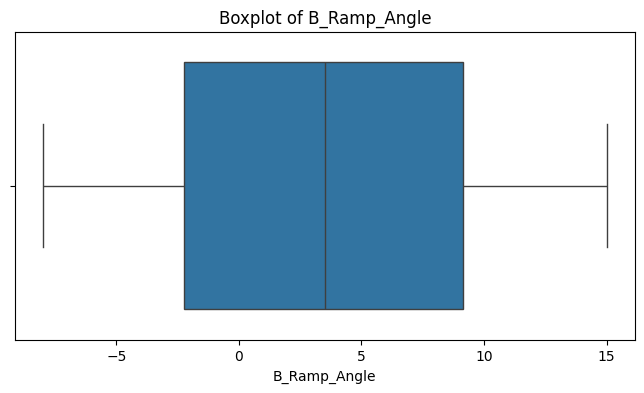

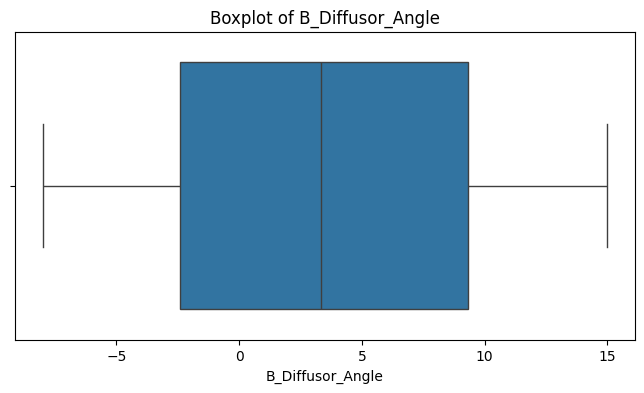

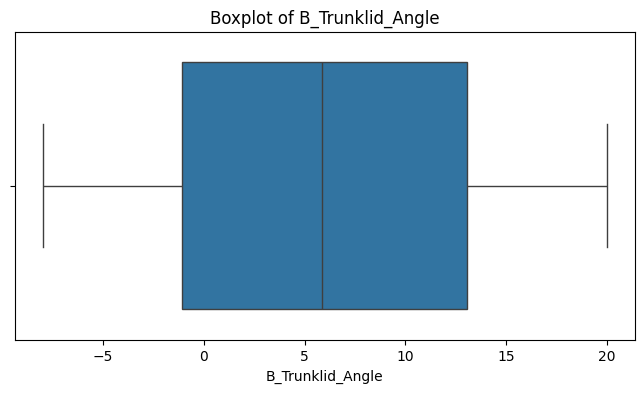

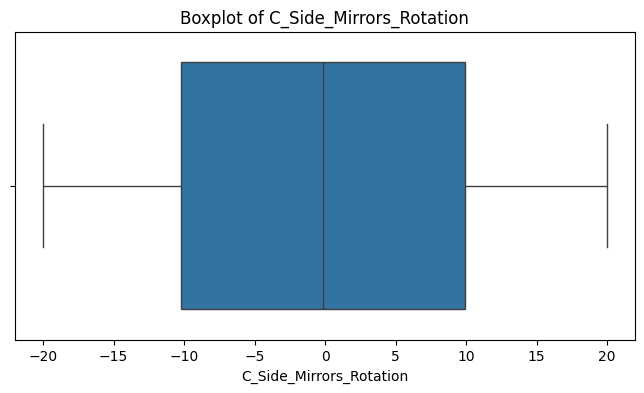

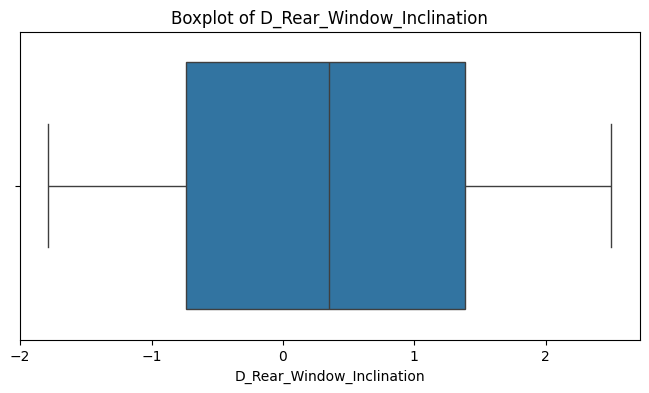

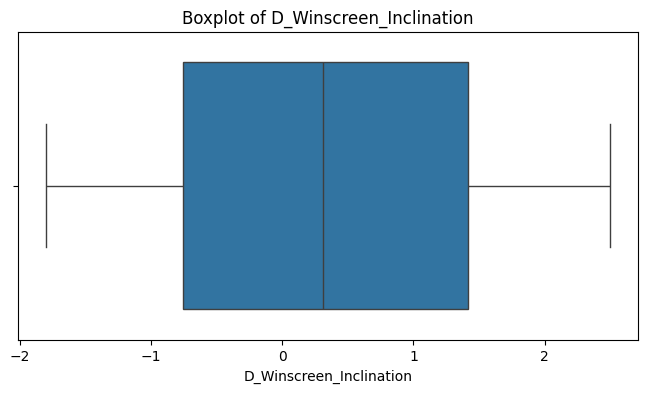

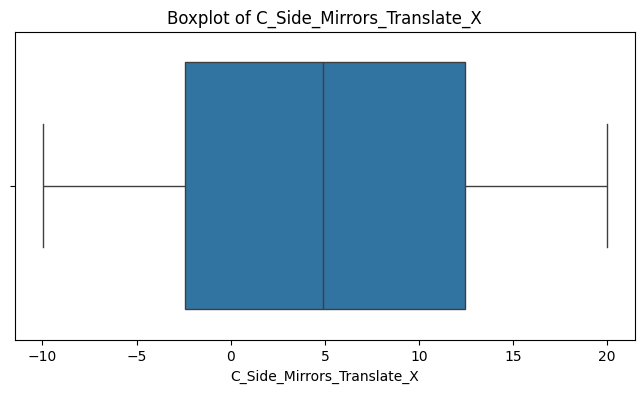

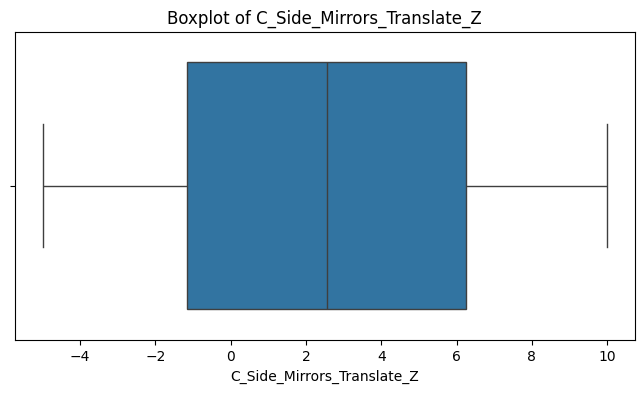

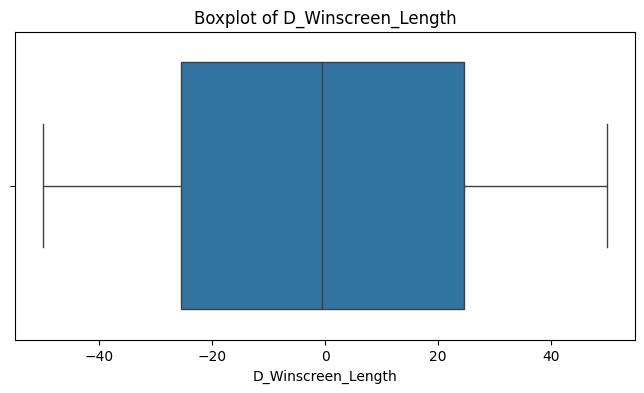

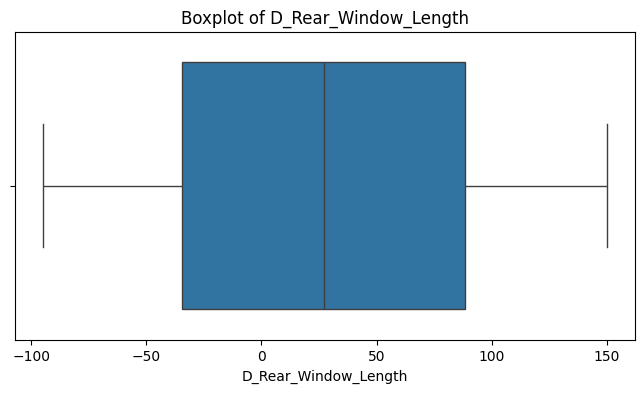

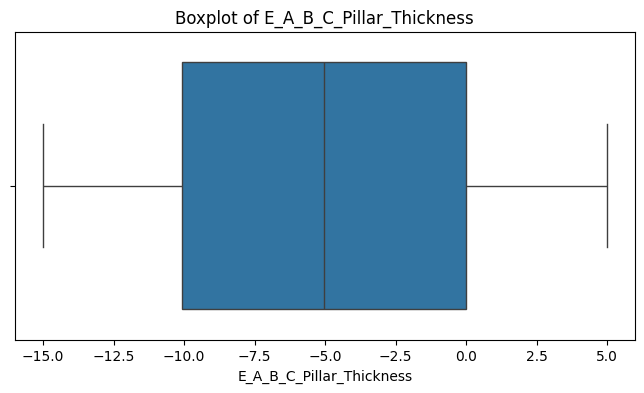

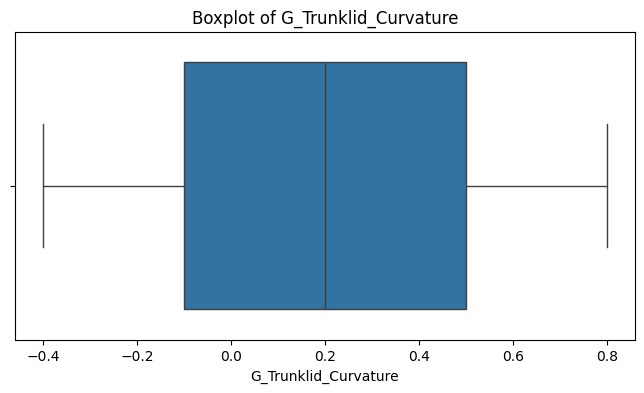

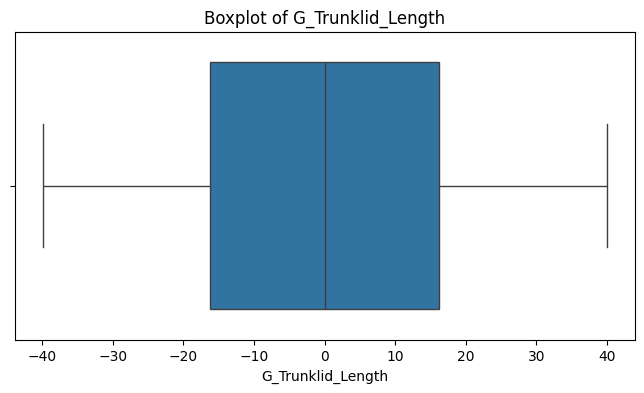

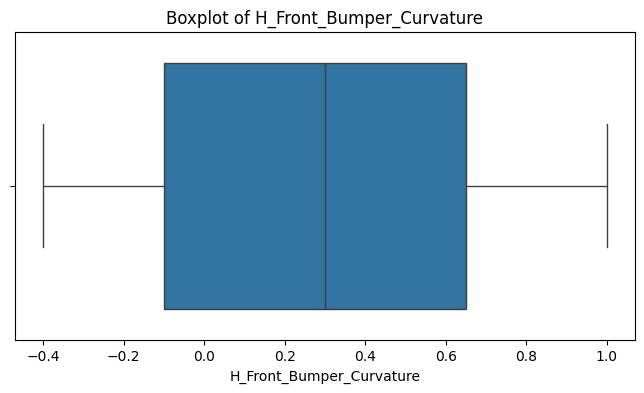

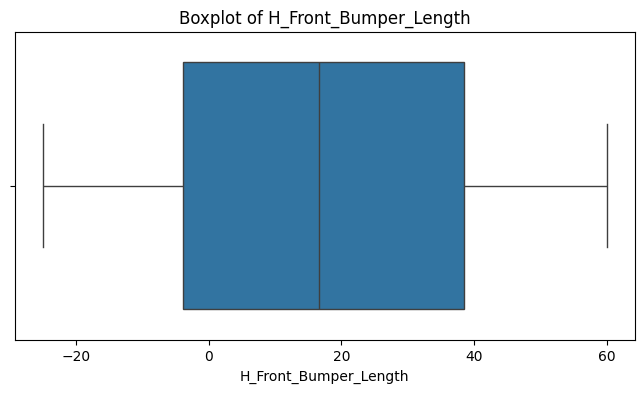

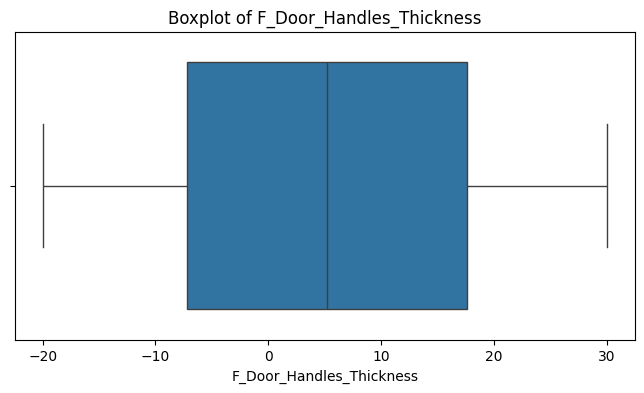

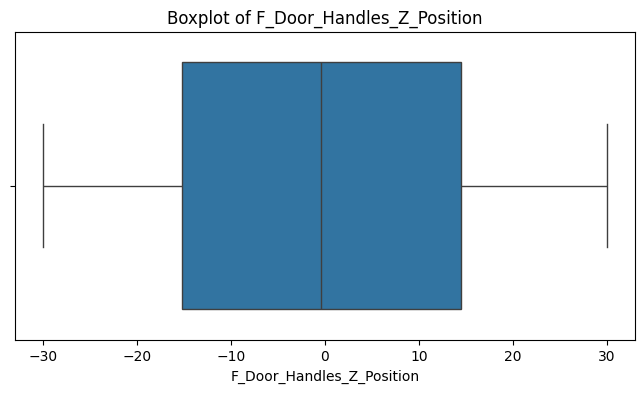

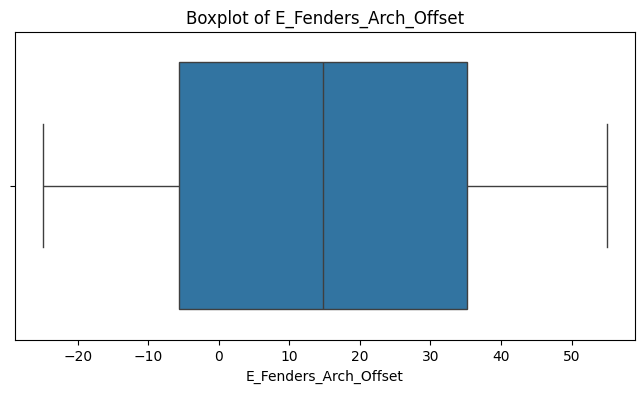

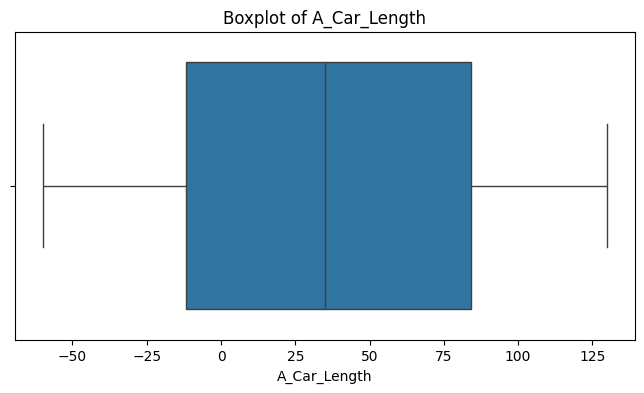

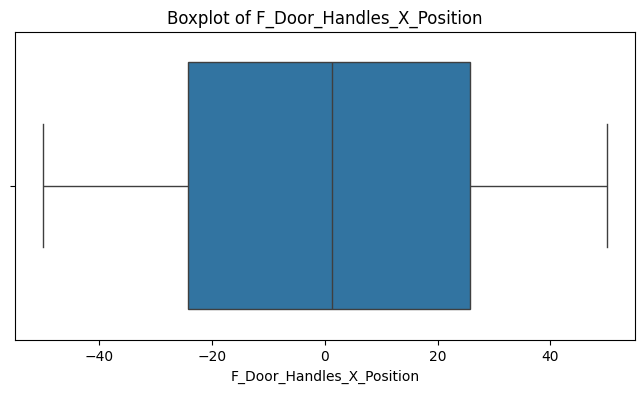

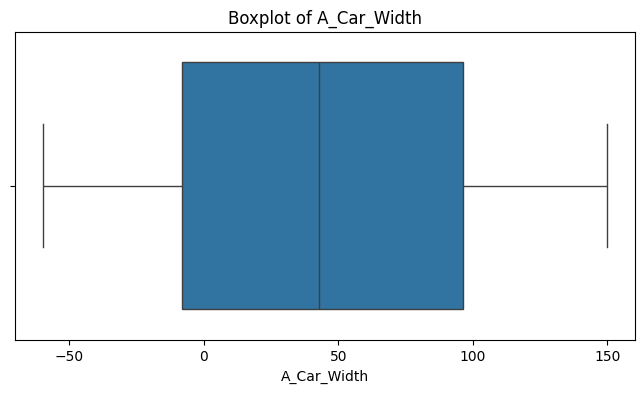

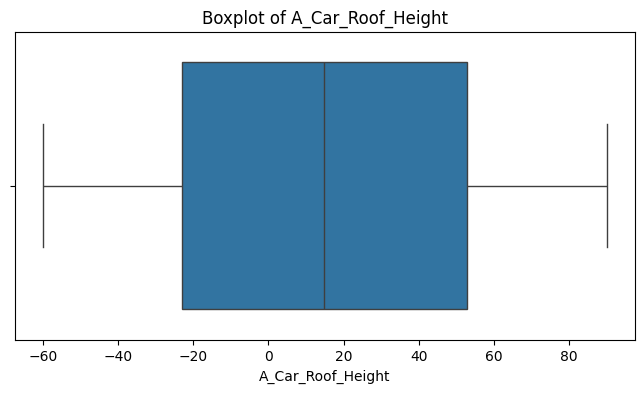

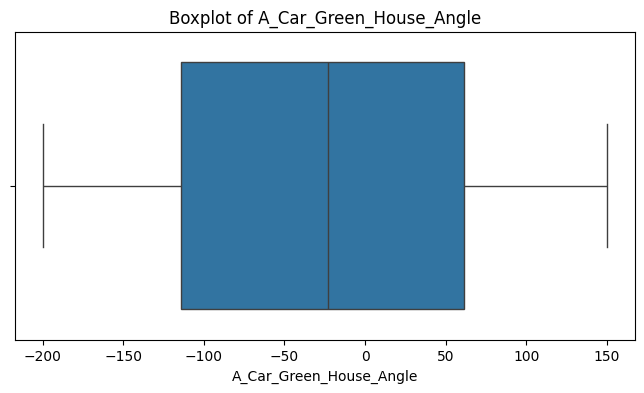

In [17]:
# Plot boxplots for features
for column in feature_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


# Feature Importance using Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Drop non-numeric columns
X = data.drop(columns=['Experiment', 'Average Cd', 'Std Cd'])
y = data['Average Cd']


In [19]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

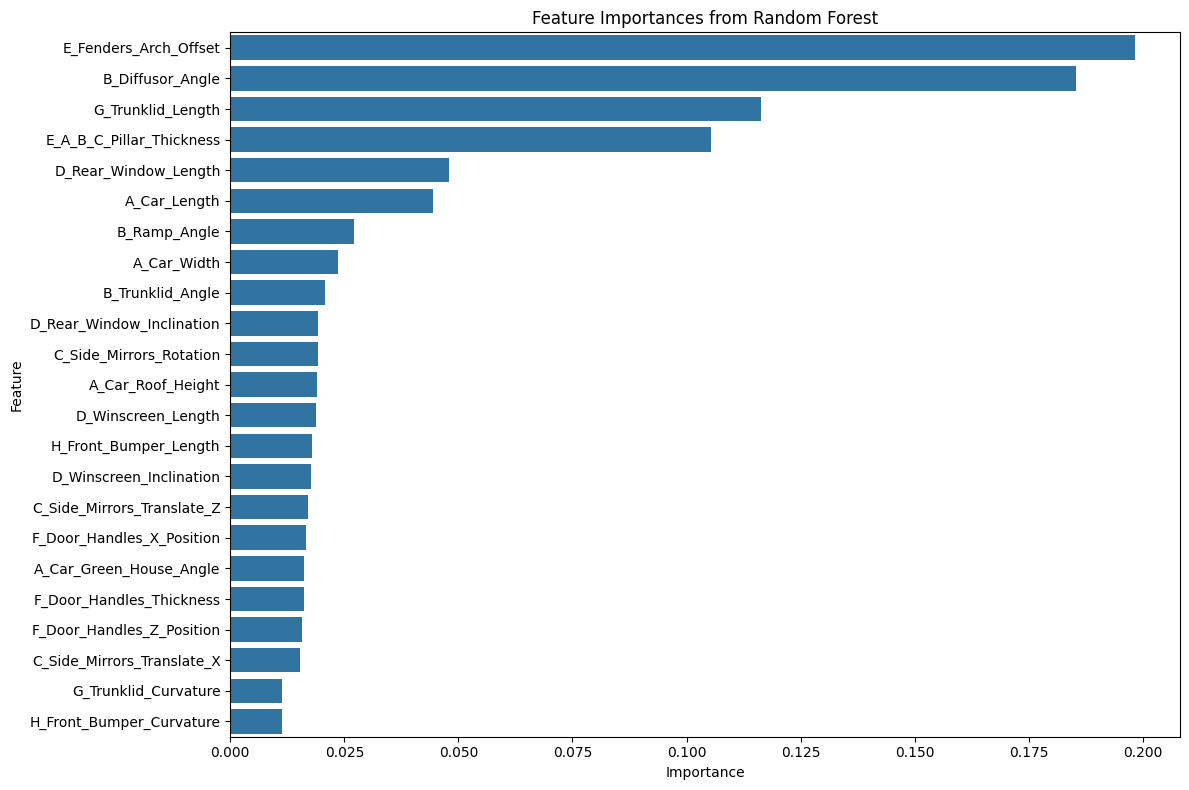

In [20]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(
    by='Importance', ascending=False
)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df
)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [21]:
# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
                      Feature  Importance
17      E_Fenders_Arch_Offset    0.198238
1            B_Diffusor_Angle    0.185279
12          G_Trunklid_Length    0.116217
10   E_A_B_C_Pillar_Thickness    0.105266
9        D_Rear_Window_Length    0.047973
18               A_Car_Length    0.044400
0                B_Ramp_Angle    0.027021
20                A_Car_Width    0.023549
2            B_Trunklid_Angle    0.020748
4   D_Rear_Window_Inclination    0.019180


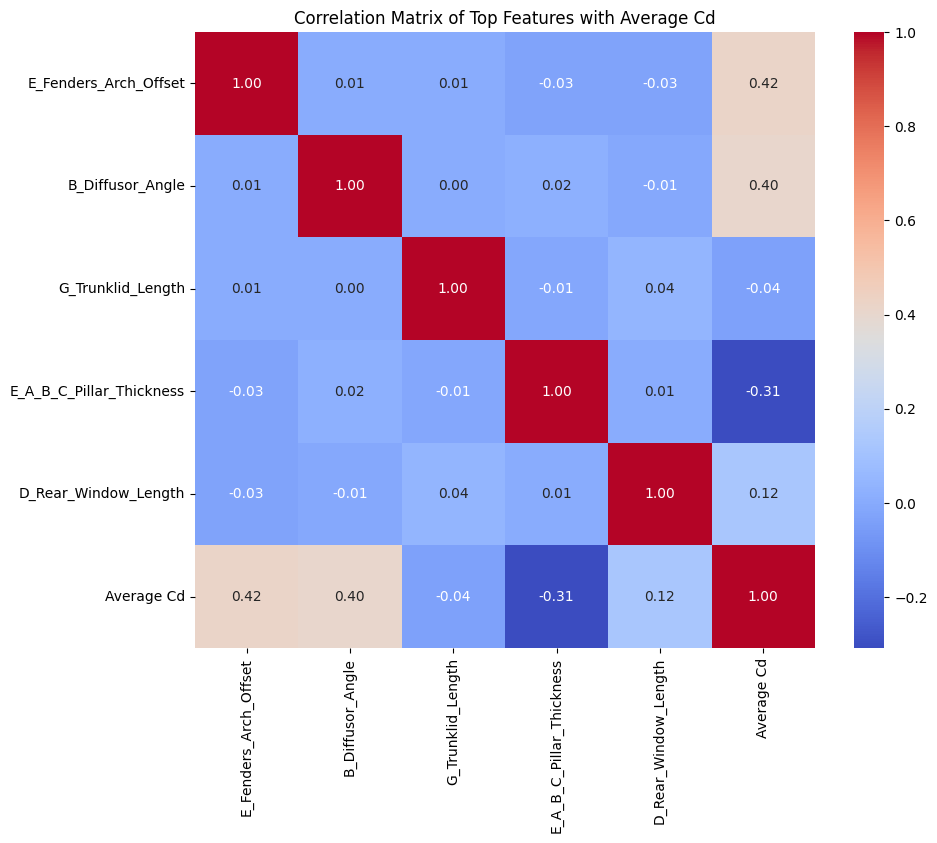

In [22]:
top_features = feature_importance_df['Feature'].head(5).tolist()

# Correlation matrix of top features with 'Average Cd'
top_corr = data[top_features + ['Average Cd']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    top_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Matrix of Top Features with Average Cd')
plt.show()


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare data for VIF calculation
X_top = data[top_features]

# Add a small constant to avoid division by zero in VIF calculation
X_top = X_top + 1e-10

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_top.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_top.values, i) for i in range(len(X_top.columns))
]

print("VIF Scores for Top Features:")
print(vif_data)


VIF Scores for Top Features:
                    Feature       VIF
0     E_Fenders_Arch_Offset  1.202700
1          B_Diffusor_Angle  1.125991
2         G_Trunklid_Length  1.001349
3  E_A_B_C_Pillar_Thickness  1.250542
4      D_Rear_Window_Length  1.073942


In [24]:
vif_data

,Feature,VIF
0,E_Fenders_Arch_Offset,1.202700
1,B_Diffusor_Angle,1.125991
2,G_Trunklid_Length,1.001349
3,E_A_B_C_Pillar_Thickness,1.250542
4,D_Rear_Window_Length,1.073942


# Feature engineering

In [25]:
# Assuming 'data' is your DataFrame

# Aspect Ratios
data['Length_Width_Ratio'] = data['A_Car_Length'] / data['A_Car_Width']
data['Rear_Windscreen_Length_Ratio'] = data['D_Rear_Window_Length'] / data['D_Winscreen_Length']

# Combined Angles
data['Total_Ramp_Diffusor_Angle'] = data['B_Ramp_Angle'] + data['B_Diffusor_Angle']
data['Average_Rear_Inclination'] = (data['B_Trunklid_Angle'] + data['D_Rear_Window_Inclination']) / 2

# Interaction Terms
data['Frontal_Area'] = data['A_Car_Width'] * data['A_Car_Roof_Height']
data['Fender_Wheelbase_Interaction'] = data['E_Fenders_Arch_Offset'] * data['A_Car_Length']

# Non-linear Transformations
data['Car_Length_Squared'] = data['A_Car_Length'] ** 2
data['Sqrt_Diffusor_Angle'] = np.sqrt(abs(data['B_Diffusor_Angle']))

# Ratios Involving Angles and Lengths
data['Ramp_Angle_Length_Ratio'] = data['B_Ramp_Angle'] / data['A_Car_Length']
data['Trunklid_Length_Ratio'] = data['G_Trunklid_Length'] / data['A_Car_Length']

# Aggregated Features
data['Estimated_Surface_Area'] = 2 * (
    data['A_Car_Length'] * data['A_Car_Width'] +
    data['A_Car_Length'] * data['A_Car_Roof_Height'] +
    data['A_Car_Width'] * data['A_Car_Roof_Height']
)
data['Mean_Angles'] = (
    data['B_Ramp_Angle'] +
    data['B_Diffusor_Angle'] +
    data['B_Trunklid_Angle'] +
    data['D_Rear_Window_Inclination'] +
    data['D_Winscreen_Inclination']
) / 5

# Feature Interactions Based on Physical Principles
data['Side_Mirror_Impact'] = data['C_Side_Mirrors_Rotation'] * np.sqrt(
    data['C_Side_Mirrors_Translate_X'] ** 2 + data['C_Side_Mirrors_Translate_Z'] ** 2
)
data['Aerodynamic_Sharpness'] = (
    data['E_Fenders_Arch_Offset'] + data['E_A_B_C_Pillar_Thickness']
) / data['A_Car_Length']


In [26]:
data.shape

(3747, 40)

In [27]:
new_features = [
    'Length_Width_Ratio',
    'Rear_Windscreen_Length_Ratio',
    'Total_Ramp_Diffusor_Angle',
    'Average_Rear_Inclination',
    'Frontal_Area',
    'Fender_Wheelbase_Interaction',
    'Car_Length_Squared',
    'Sqrt_Diffusor_Angle',
    'Ramp_Angle_Length_Ratio',
    'Trunklid_Length_Ratio',
    'Estimated_Surface_Area',
    'Mean_Angles',
    'Side_Mirror_Impact',
    'Aerodynamic_Sharpness'
]

# Correlation with 'Average Cd'
for feature in new_features:
    corr = data[feature].corr(data['Average Cd'])
    print(f"Correlation between {feature} and Average Cd: {corr:.4f}")


Correlation between Length_Width_Ratio and Average Cd: -0.0200
Correlation between Rear_Windscreen_Length_Ratio and Average Cd: 0.0198
Correlation between Total_Ramp_Diffusor_Angle and Average Cd: 0.2112
Correlation between Average_Rear_Inclination and Average Cd: -0.0132
Correlation between Frontal_Area and Average Cd: -0.0066
Correlation between Fender_Wheelbase_Interaction and Average Cd: 0.1049
Correlation between Car_Length_Squared and Average Cd: -0.1610
Correlation between Sqrt_Diffusor_Angle and Average Cd: 0.2933
Correlation between Ramp_Angle_Length_Ratio and Average Cd: 0.0149
Correlation between Trunklid_Length_Ratio and Average Cd: 0.0108
Correlation between Estimated_Surface_Area and Average Cd: -0.1373
Correlation between Mean_Angles and Average Cd: 0.1482
Correlation between Side_Mirror_Impact and Average Cd: -0.0378
Correlation between Aerodynamic_Sharpness and Average Cd: -0.0107


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = data.drop(columns=['Experiment', 'Average Cd', 'Std Cd'])  # Exclude target and non-numeric columns
y = data['Average Cd']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 20 features
print("Top 20 Features after Feature Engineering:")
print(feature_importance_df.head(20))


Top 20 Features after Feature Engineering:
                         Feature  Importance
17         E_Fenders_Arch_Offset    0.186509
1               B_Diffusor_Angle    0.167690
10      E_A_B_C_Pillar_Thickness    0.098540
12             G_Trunklid_Length    0.082428
9           D_Rear_Window_Length    0.038860
32         Trunklid_Length_Ratio    0.033241
18                  A_Car_Length    0.020378
28  Fender_Wheelbase_Interaction    0.018212
33        Estimated_Surface_Area    0.017368
34                   Mean_Angles    0.016489
0                   B_Ramp_Angle    0.016212
23            Length_Width_Ratio    0.015535
24  Rear_Windscreen_Length_Ratio    0.014854
4      D_Rear_Window_Inclination    0.013816
30           Sqrt_Diffusor_Angle    0.013656
35            Side_Mirror_Impact    0.013474
20                   A_Car_Width    0.013323
36         Aerodynamic_Sharpness    0.013277
8             D_Winscreen_Length    0.013157
14         H_Front_Bumper_Length    0.012843


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Retrain the model without new features for comparison
X_original = X.drop(columns=new_features)
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(
    X_original, y, test_size=0.2, random_state=42
)

rf_orig = RandomForestRegressor(n_estimators=100, random_state=42)
rf_orig.fit(X_train_orig, y_train_orig)

# Predictions on validation set without new features
y_pred_before = rf_orig.predict(X_val_orig)

# Calculate metrics for model without new features
mae_before = mean_absolute_error(y_val_orig, y_pred_before)
mse_before = mean_squared_error(y_val_orig, y_pred_before)
print(f"MAE before adding new features: {mae_before:.4f}")
print(f"MSE before adding new features: {mse_before:.4f}")

# Train the model with new features included
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_new.fit(X_train_new, y_train_new)

# Predictions on validation set with new features
y_pred_after = rf_new.predict(X_val_new)

# Calculate metrics for model with new features
mae_after = mean_absolute_error(y_val_new, y_pred_after)
mse_after = mean_squared_error(y_val_new, y_pred_after)
print(f"MAE after adding new features: {mae_after:.4f}")
print(f"MSE after adding new features: {mse_after:.4f}")


MAE before adding new features: 0.0119
MSE before adding new features: 0.0002
MAE after adding new features: 0.0122
MSE after adding new features: 0.0003


# Deep Neural Network included with the Engineered Features

In [30]:
data

,Experiment,B_Ramp_Angle,B_Diffusor_Angle,B_Trunklid_Angle,C_Side_Mirrors_Rotation,D_Rear_Window_Inclination,D_Winscreen_Inclination,C_Side_Mirrors_Translate_X,C_Side_Mirrors_Translate_Z,D_Winscreen_Length,...,Frontal_Area,Fender_Wheelbase_Interaction,Car_Length_Squared,Sqrt_Diffusor_Angle,Ramp_Angle_Length_Ratio,Trunklid_Length_Ratio,Estimated_Surface_Area,Mean_Angles,Side_Mirror_Impact,Aerodynamic_Sharpness
0,E_S_WWC_WM_1,8.672640,12.269800,-6.93812,10.98820,1.98,-0.95,-5.14719,-2.243160,-6.06023,...,1541.801520,2382.583092,12573.136900,3.502827,0.077345,-0.040049,25042.828277,3.006864,61.695912,0.076687
1,E_S_WWC_WM_2,-0.038876,-2.466940,5.82266,-15.84790,-1.00,2.44,17.49850,2.100000,-8.27849,...,-795.750611,589.693444,2384.075929,1.570650,-0.000796,-0.068753,1348.841187,0.951369,-279.304346,0.337580
2,E_S_WWC_WM_3,9.576470,6.513760,-5.85023,-1.38529,-0.55,1.44,-5.29082,8.526600,49.21930,...,2093.487163,3582.113900,5282.833026,2.552207,0.131756,0.217498,18562.121551,2.226000,-13.901003,0.615056
3,E_S_WWC_WM_4,10.350600,14.846400,4.04619,-10.91980,1.17,2.11,16.17120,5.023360,-41.96530,...,3717.434757,1400.186537,3385.238216,3.853103,0.177898,0.359959,26304.296293,6.504638,-184.909928,0.352781
4,E_S_WWC_WM_5,12.971500,10.619800,-6.48716,6.18597,2.25,-0.01,9.68012,5.099230,-12.32440,...,-4742.127431,3239.529432,6601.010012,3.258803,0.159656,0.143444,5883.263289,3.868828,67.681090,0.310073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3742,N_S_WW_WM_658,-4.862010,0.028316,10.08790,-2.97830,1.34,-0.26,12.80390,-1.277330,-49.49090,...,1364.271702,2544.634162,3828.478500,0.168274,-0.078578,0.408786,11984.949024,1.266841,-38.323145,0.697355
3743,N_S_WW_WM_659,7.235190,-2.750330,10.17000,-6.86644,-1.21,-1.66,6.12711,-0.280635,23.34730,...,2982.489114,-874.549700,3470.211372,1.658412,-0.122821,0.217828,-8182.086553,2.356972,-42.115540,-0.222864
3744,N_S_WW_WM_661,-7.244580,9.884100,2.36779,5.10090,-1.65,1.18,2.44185,2.421960,-10.10920,...,37.270326,4158.638013,16594.334761,3.143899,-0.056238,0.191172,3437.726493,0.907462,17.543330,0.238332
3745,N_S_WW_WM_662,-1.723280,0.439101,3.66799,4.63150,2.15,1.82,-2.56101,-3.324480,46.41320,...,7134.311020,4913.016160,12365.440000,0.662647,-0.015497,0.114159,52245.623799,1.270762,19.436270,0.344805


In [31]:
# Prepare data
X = data.drop(columns=['Experiment', 'Average Cd', 'Std Cd'])  # Exclude target and non-numeric columns
y = data['Average Cd']

# Split the data first to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply transformation to test data
X_test_scaled = scaler.transform(X_test)


In [32]:
X_train_scaled

array([[ 0.97304344, -0.52061857,  1.33640489, ...,  1.12087549,
        -2.04553193,  0.03849582],
       [ 0.25966653, -0.43615044, -1.57127286, ..., -1.30500569,
        -0.31895002,  0.05367641],
       [ 0.39777311, -1.63989716, -0.36265346, ..., -1.07931861,
        -0.75051401, -0.03676555],
       ...,
       [-1.16997539,  1.33106917, -0.48136014, ..., -0.18533409,
         0.01279879,  0.78990611],
       [ 0.51375693, -1.71217419, -0.33640815, ..., -0.90983481,
         0.50264143, -0.02233223],
       [-1.14581916,  0.48121718, -1.35422739, ..., -1.248706  ,
         0.67829532, -0.01893226]])

In [33]:
X_train_scaled.shape

(2997, 37)

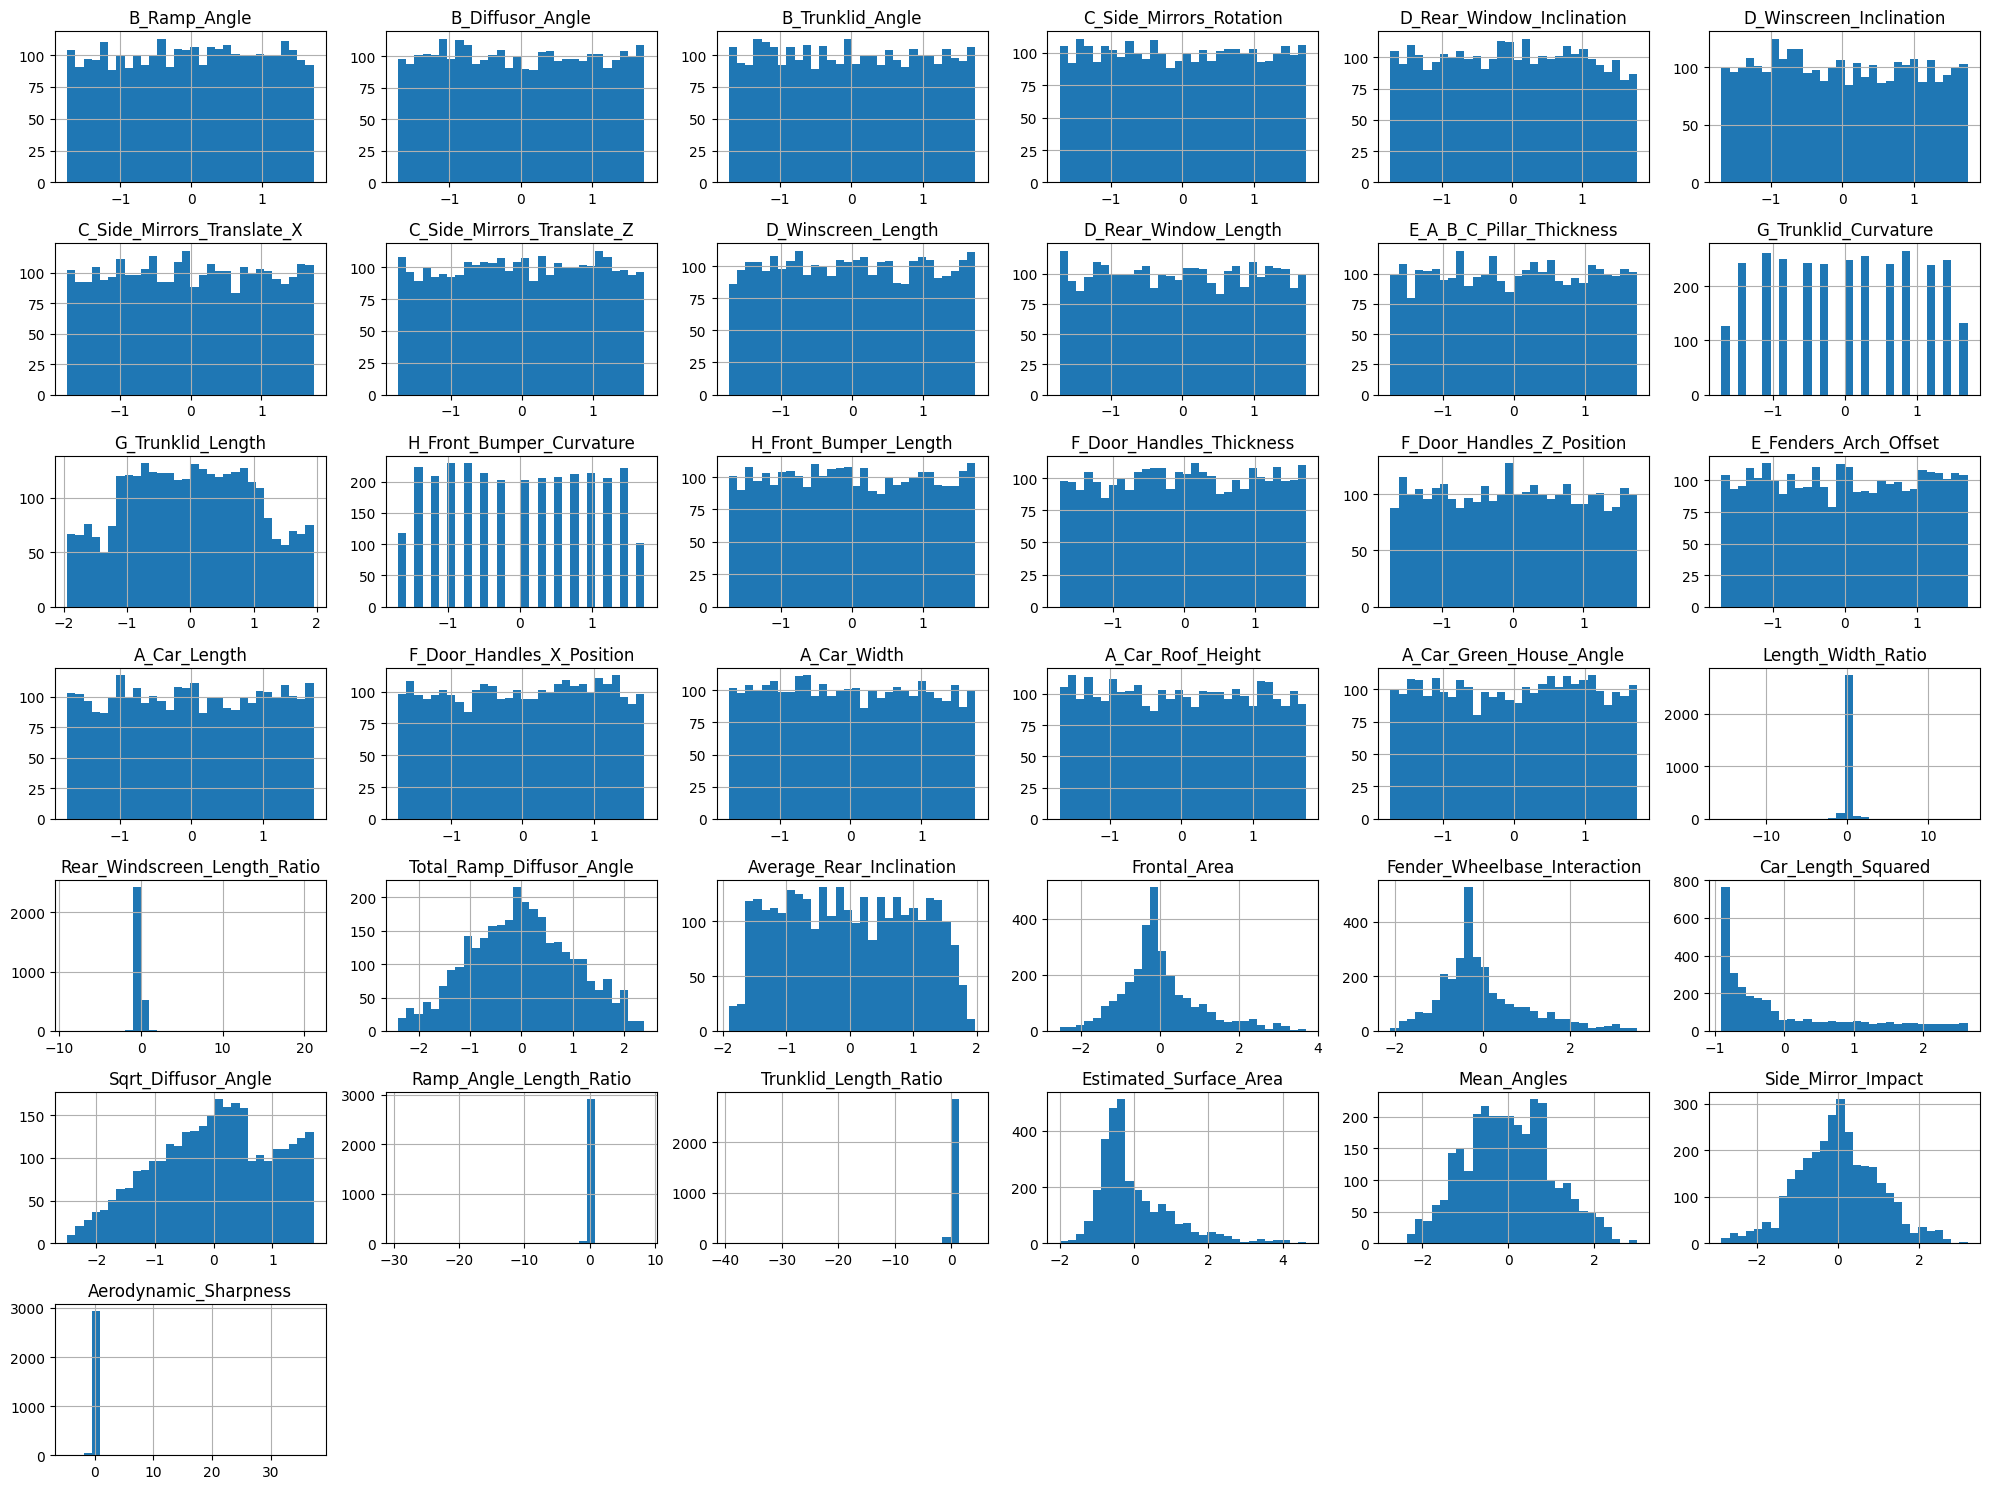

In [34]:
# Convert the scaled array back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now you can select columns using their names
X_train_scaled_df[X_train_scaled_df.columns].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()


In [35]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])


In [37]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [38]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0420 - mae: 0.1396 - mse: 0.0420 - val_loss: 0.0061 - val_mae: 0.0594 - val_mse: 0.0061
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0452 - mae: 0.0635 - mse: 0.0452 - val_loss: 0.0029 - val_mae: 0.0418 - val_mse: 0.0029
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - mae: 0.0321 - mse: 0.0017 - val_loss: 0.0020 - val_mae: 0.0345 - val_mse: 0.0020
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7933e-04 - mae: 0.0238 - mse: 9.7933e-04 - val_loss: 0.0016 - val_mae: 0.0306 - val_mse: 0.0016
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0255 - mse: 0.0022 - val_loss: 0.0023 - val_mae: 0.0315 - val_mse: 0.0023
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - mae: 0.0220 - mse: 0.0018 - val_loss: 0.0024 - val_mae: 0.0358 - val_mse: 0.0024
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0296 - mse: 0.0022 - va

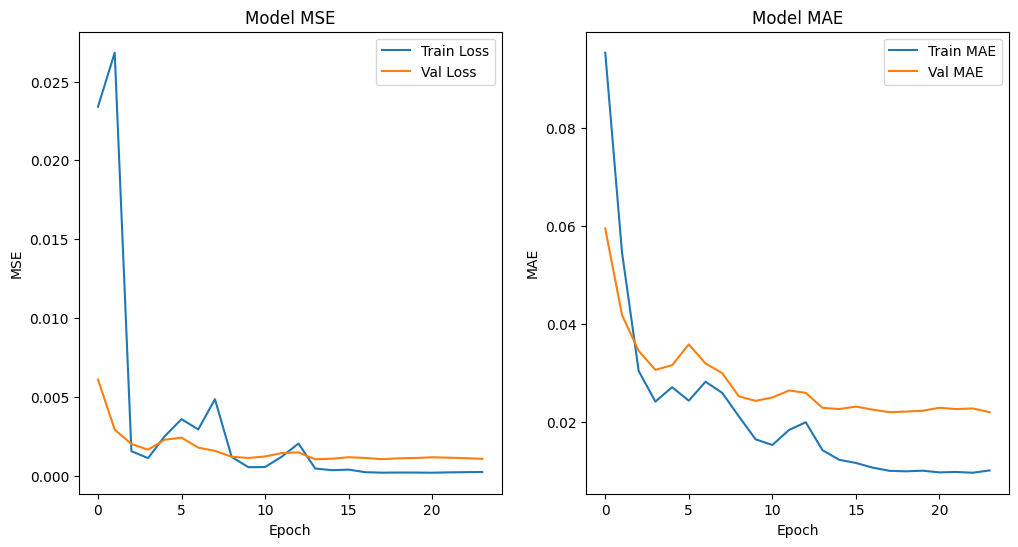

In [39]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [40]:
# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


24/24 - 0s - 2ms/step - loss: 0.0016 - mae: 0.0236 - mse: 0.0016
Test MAE: 0.0236233901232481
Test MSE: 0.0015730162849649787


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


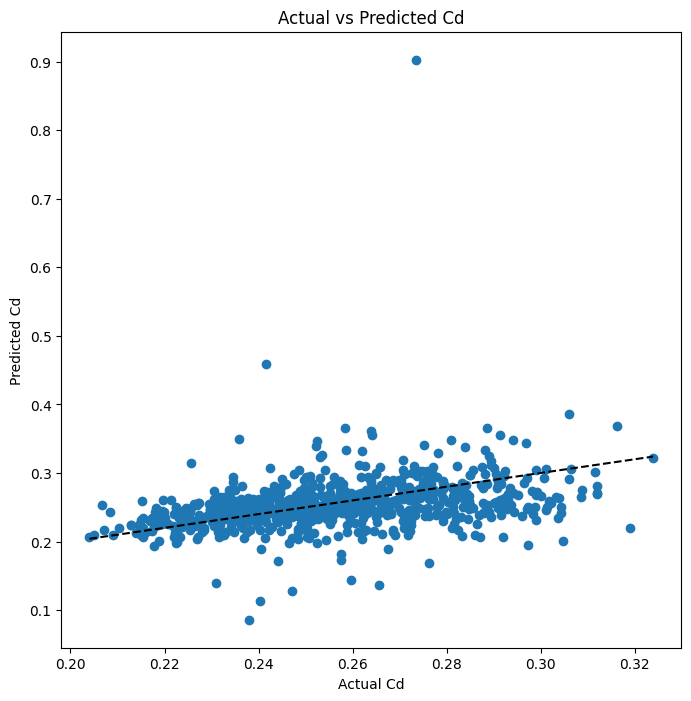

In [41]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Compare predictions with actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Cd')
plt.ylabel('Predicted Cd')
plt.title('Actual vs Predicted Cd')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


# Deep Neural Network excluded with the Engineered Features

In [42]:
X_original = X.drop(columns=new_features)
X_original.shape

(3747, 23)

In [43]:
# Split the data first to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply transformation to test data
X_test_scaled = scaler.transform(X_test)


In [44]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])


In [46]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [47]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0510 - mae: 0.1602 - mse: 0.0510 - val_loss: 0.0052 - val_mae: 0.0561 - val_mse: 0.0052
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - mae: 0.0453 - mse: 0.0033 - val_loss: 0.0028 - val_mae: 0.0402 - val_mse: 0.0028
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - mae: 0.0315 - mse: 0.0017 - val_loss: 0.0021 - val_mae: 0.0334 - val_mse: 0.0021
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - val_loss: 0.0017 - val_mae: 0.0301 - val_mse: 0.0017
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0731e-04 - mae: 0.0217 - mse: 8.0731e-04 - val_loss: 0.0015 - val_mae: 0.0276 - val_mse: 0.0015
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0481e-04 - mae: 0.0187 - mse: 6.0481e-04 - val_loss: 0.0015 - val_mae: 0.0279 - val_mse: 0.0015
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9248e-04 - mae: 0.0171 - mse:

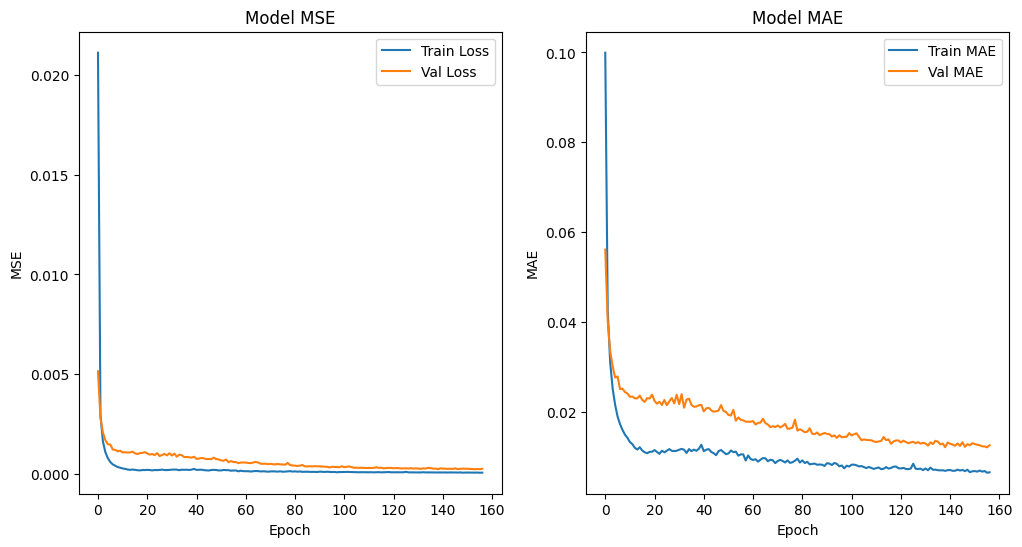

In [48]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [49]:
# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


24/24 - 0s - 2ms/step - loss: 2.9860e-04 - mae: 0.0130 - mse: 2.9860e-04
Test MAE: 0.013008247129619122
Test MSE: 0.0002985968312714249


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


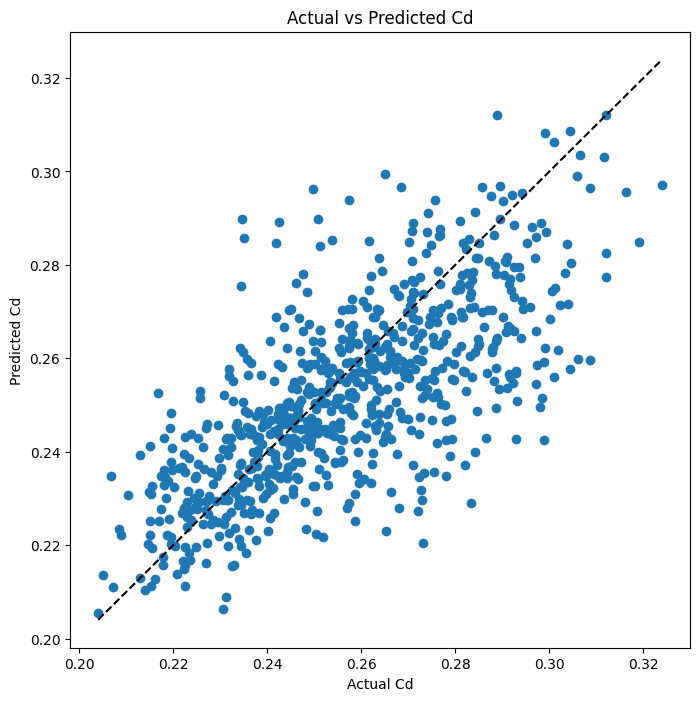

In [50]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Compare predictions with actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Cd')
plt.ylabel('Predicted Cd')
plt.title('Actual vs Predicted Cd')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


# Deep Neural Network with only top important features taken from Random Forest

In [52]:
top_features

['E_Fenders_Arch_Offset',
 'B_Diffusor_Angle',
 'G_Trunklid_Length',
 'E_A_B_C_Pillar_Thickness',
 'D_Rear_Window_Length']

In [55]:
X_top = X[top_features]
X_top.shape

(3747, 5)

In [56]:
X_top.head(5)

,E_Fenders_Arch_Offset,B_Diffusor_Angle,G_Trunklid_Length,E_A_B_C_Pillar_Thickness,D_Rear_Window_Length
0,21.2484,12.26980,-4.49071,-12.64950,81.3638
1,12.0772,-2.46694,-3.35699,4.40581,105.8880
2,49.2840,6.51376,15.80840,-4.57981,80.8977
3,24.0653,14.84640,20.94340,-3.53949,-11.8186
4,39.8728,10.61980,11.65430,-14.68040,63.8911


In [57]:
# Split the data first to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply transformation to test data
X_test_scaled = scaler.transform(X_test)


In [58]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])


In [60]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


In [61]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0113 - mae: 0.0779 - mse: 0.0113 - val_loss: 0.0015 - val_mae: 0.0307 - val_mse: 0.0015
Epoch 2/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0287 - mse: 0.0013 - val_loss: 7.1433e-04 - val_mae: 0.0212 - val_mse: 7.1433e-04
Epoch 3/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7691e-04 - mae: 0.0192 - mse: 5.7691e-04 - val_loss: 5.2565e-04 - val_mae: 0.0188 - val_mse: 5.2565e-04
Epoch 4/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4143e-04 - mae: 0.0171 - mse: 4.4143e-04 - val_loss: 3.8576e-04 - val_mae: 0.0159 - val_mse: 3.8576e-04
Epoch 5/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5402e-04 - mae: 0.0150 - mse: 3.5402e-04 - val_loss: 3.9976e-04 - val_mae: 0.0161 - val_mse: 3.9976e-04
Epoch 6/200
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4343e-04 - mae: 0.0148 - mse: 3.4343e-04 - val_loss: 3.8918e-04 - val_mae: 0.0158 - val_mse: 3.8918e-04
Epoch 7/200
75/75 ━━━━━━━━━━━━━━━━

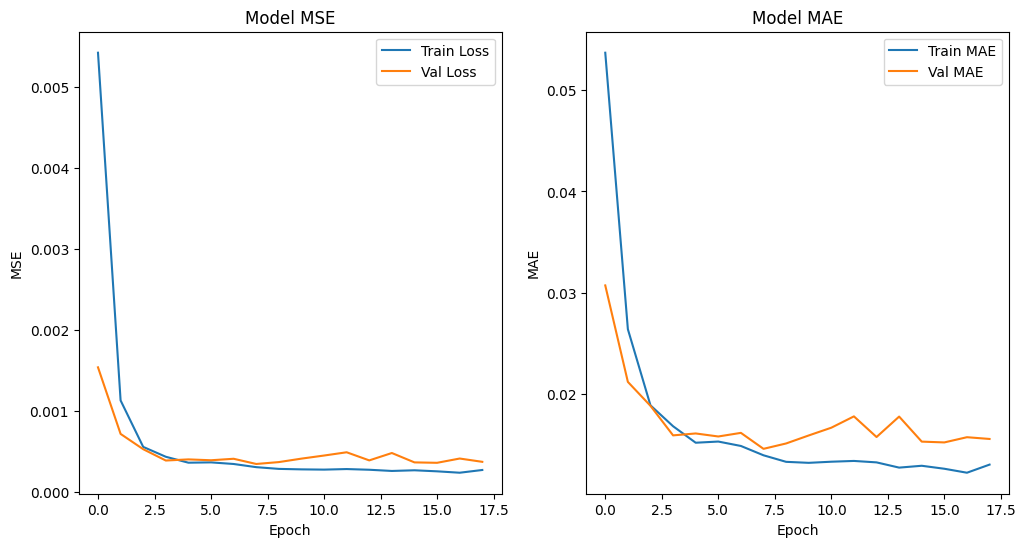

In [62]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [63]:
# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')


24/24 - 0s - 2ms/step - loss: 3.8734e-04 - mae: 0.0161 - mse: 3.8734e-04
Test MAE: 0.016123199835419655
Test MSE: 0.0003873449459206313


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


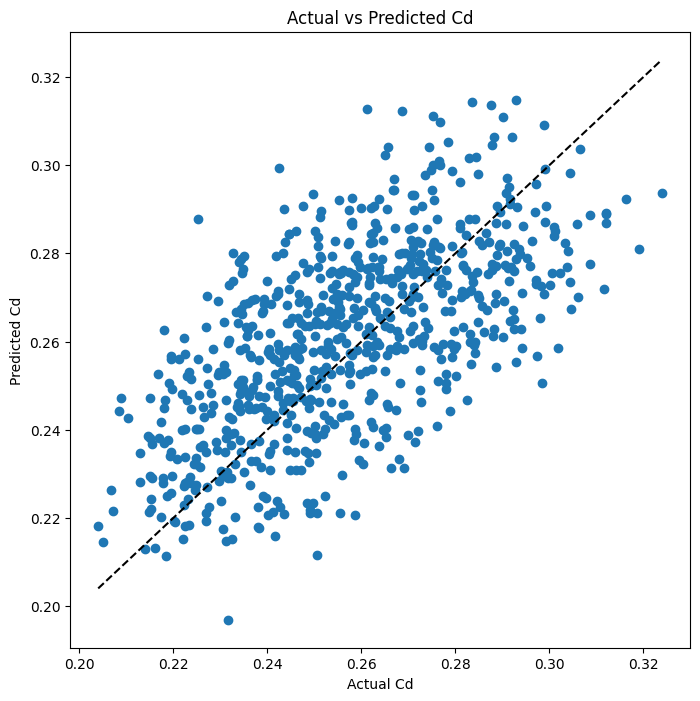

In [64]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Compare predictions with actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Cd')
plt.ylabel('Predicted Cd')
plt.title('Actual vs Predicted Cd')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()
